# Contents <a id='top'></a>

1. <a href=#eda>Data Exploration</a>
1. <a href=#intro>Introduction to Regression</a>
1. <a href=#resid>Residual Analysis</a>
1. <a href=#simple>A Simple Model</a>
1. <a href=#improvement>An Improvement</a>
1. <a href=#ref>References and Links</a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\wongs\Anaconda3\envs\myenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\wongs\Anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\wongs\Anaconda3\envs\myenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


<a id='eda'></a>
# 1. Exploring Engine Dataset
<a href=#top>(back to top)</a>

For this tutorial, we shall work with a data set from the UCI machine learning repository. It contains real estate prices in the Xindian district of Taiwan. Our goal is to answer the following question:

> How well can we explain pass/fail in engine test?

Let us first explore the dataset with Python. Make a few plots, and share what you see.

In [7]:
re2 = pd.read_excel('../data/Dataset_5.xlsx', header=0, na_values='NA')

In [8]:
re2.head()

,ESN,PassFail,Vibration,A1,A2,B1,B2,C1,C3,D1,D3,Ax,Ay,Bx,By,Ex,Ey,Fx,Fy
0,1,Reject,0.49,15.0,15.0,11.0,2.0,20,172.0,116,3.0,32,57,207,339,74,79,176,60
1,2,Pass,0.17,23.0,39.0,27.0,12.0,6,339.0,116,3.0,143,104,342,357,121,131,153,290
2,4,Pass,0.24,12.0,17.0,31.0,12.0,19,169.0,111,99.0,106,22,254,123,59,25,325,170
3,5,Reject,0.54,7.0,6.0,6.0,16.0,19,291.0,16,29.0,138,76,54,139,47,50,134,195
4,6,Pass,0.36,7.0,6.0,6.0,16.0,12,312.0,16,29.0,138,76,54,139,18,79,335,58


In [9]:
re2.loc[:,'PassFail':].describe().round(3)

,Vibration,A1,A2,B1,B2,C1,C3,D1,D3,Ax,Ay,Bx,By,Ex,Ey,Fx,Fy
count,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000,180.000
mean,0.257,7.422,8.947,20.637,7.724,13.917,168.473,88.156,177.995,94.022,149.017,95.011,190.506,67.117,155.956,104.739,178.850
std,0.144,5.349,7.940,11.297,6.547,8.727,101.788,33.119,126.973,38.225,100.537,67.929,100.856,29.322,102.342,86.633,104.884
min,0.050,0.000,0.000,2.000,0.000,0.000,0.000,6.000,1.000,10.000,2.000,0.000,7.000,2.000,5.000,1.000,4.000
25%,0.150,4.000,3.929,12.000,3.000,7.000,78.352,65.750,48.750,65.750,66.500,52.250,110.500,48.750,65.750,49.000,86.500
50%,0.220,6.000,6.999,18.000,5.398,12.000,166.162,93.000,177.000,102.000,131.000,86.000,201.000,66.000,135.000,78.000,175.000
75%,0.342,9.000,11.000,27.162,10.112,19.000,246.750,111.250,306.750,128.000,229.750,112.750,276.750,89.000,240.000,121.000,277.250
max,0.630,35.000,39.000,57.000,33.000,49.000,359.000,152.000,359.000,149.000,359.000,347.000,362.000,140.000,359.000,335.000,359.000


<AxesSubplot:>

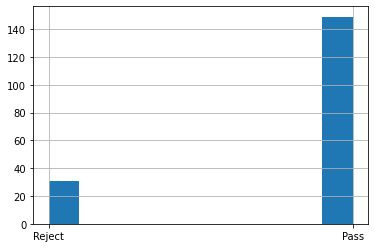

In [10]:
re2.PassFail.hist()

Plot scatter plot of y=price against x=trans_date, house_age, dist_MRT, num_stores, Xs & Ys

Text(0, 0.5, 'Vibration')

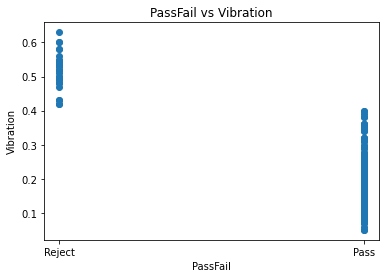

In [7]:
plt.scatter(re2.PassFail, re2.Vibration) #x-axis trans_date, y-axis price
plt.title("PassFail vs Vibration")
plt.xlabel("PassFail")
plt.ylabel("Vibration")

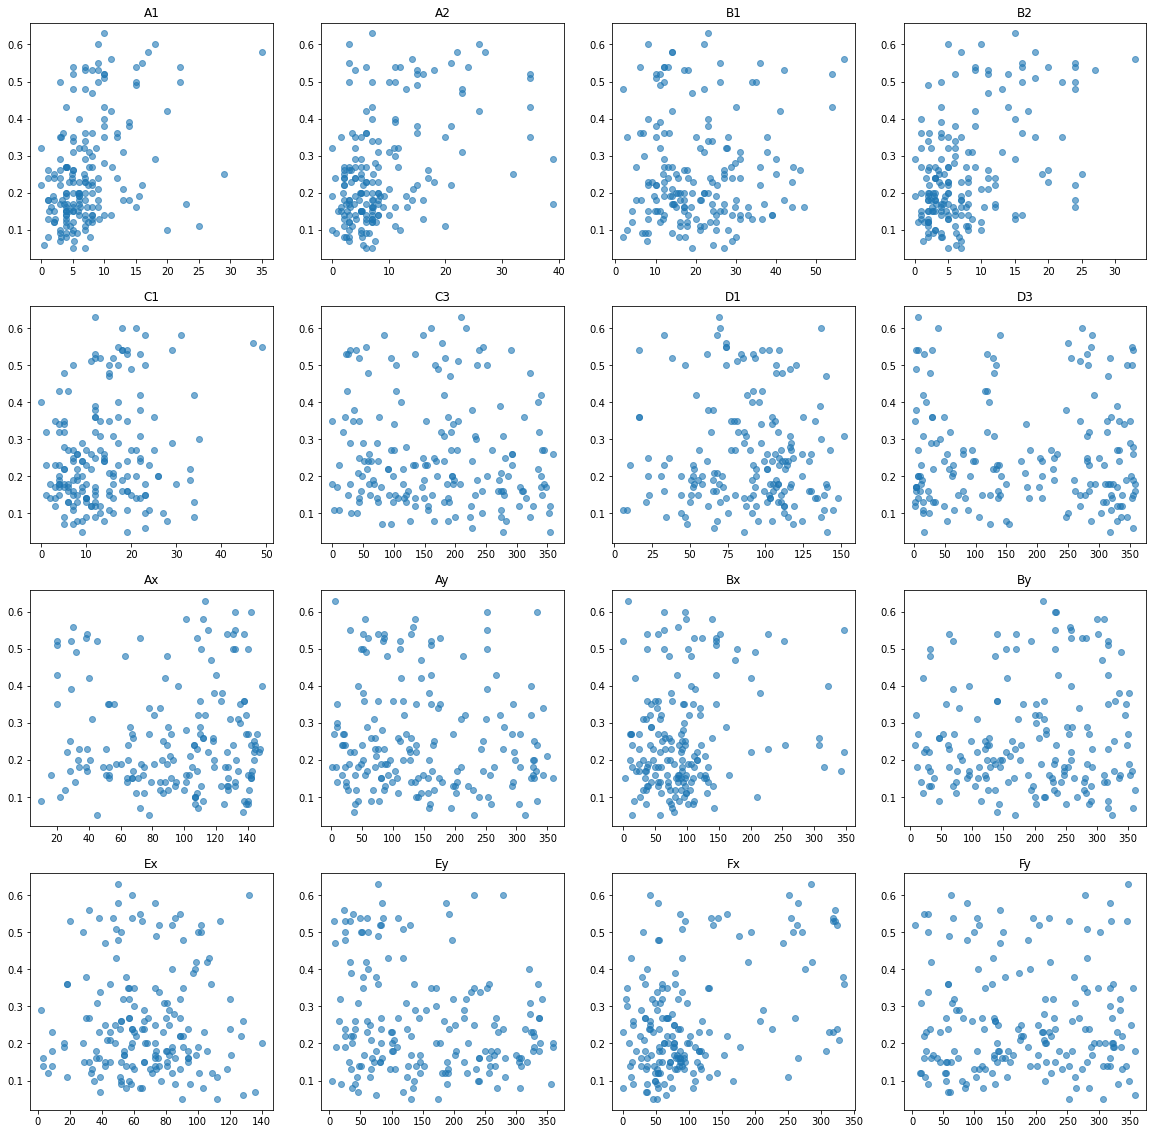

In [20]:
# Plot Features Vs Vibration

f, axs = plt.subplots(4,4 , squeeze=False, figsize=(20,20)) 

for i,cc in enumerate(X.columns[1:]):
    plt.subplot(4,4, i+1)
    plt.scatter(X[cc], re2.Vibration, alpha=0.6) # r_star is the inf using studentized defined infront
    plt.title(cc)

The trend of the plot is not obvious.

## Residual Plots



In [12]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oinf

In [13]:
X = re2[['A1', 'A2', 'B2', 'C1', 'Fx']]
y = re2.Vibration

In [14]:
X.head(2)

,A1,A2,B2,C1,Fx
0,15.0,15.0,2.0,20,176
1,23.0,39.0,12.0,6,153


In [15]:
y.head(2)

0    0.49
1    0.17
Name: Vibration, dtype: float64

In [16]:
X = sm.add_constant(X) # to ensure we get beta '0', ensure there is beta0 to have interception during fitting

In [17]:
X.head() # note that const has been added to represent beta0

,const,A1,A2,B2,C1,Fx
0,1.0,15.0,15.0,2.0,20,176
1,1.0,23.0,39.0,12.0,6,153
2,1.0,12.0,17.0,12.0,19,325
3,1.0,7.0,6.0,16.0,19,134
4,1.0,7.0,6.0,16.0,12,335


In [18]:
s_model = sm.OLS(y, X) #showing that use of model for fitting. ordinary least square (y = price, X = those variables)

In [19]:
s_results = s_model.fit() # initialise and fit the model

In [20]:
s_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Vibration   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     17.26
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           7.48e-14
Time:                        23:12:50   Log-Likelihood:                 130.25
No. Observations:                 180   AIC:                            -248.5
Df Residuals:                     174   BIC:                            -229.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1158      0.020      5.779      0.000       0.076       0.155
A1             0.0026      0.002      1.177      0.241      -0.002       0.007
A2             0.0031      0.002      2.012      0.046    5.88e-05       0.006
B2             0.0052      0.002      3.106      0.002       0.002       0.008
C1             0.0010      0.001      0.948      0.344      -0.001       0.003
Fx             0.0004      0.000      3.341      0.001       0.000       0.001
==============================================================================
Omnibus:                        3.349   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                3.255
Skew:                           0.277   Prob(JB):                        0.196
Kurtosis:                       2.642   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
s_results_inf = s_results.get_influence()
r_star = s_results_inf.get_resid_studentized_external()

# check the residuals - using the studentized residuals

In [22]:
RMSPE = np.sqrt((s_results_inf.resid_press**2).mean())
RMSPE 

0.12334737491145445

In [23]:
y.std() 
# initial noise (std deviation of the price) - if i were to fit a model with the mean price, this is the noise

0.14393559322452643

#### above std dev (original of noise 13) has been reduced by using RMSPE which shows that is it good

In [24]:
s_results.resid.std() 

# fitted residual 'r' not 'r*'
# this is definitely better than RMSPE as it uses the full model to predict yi when fitted back to the model 
# this is "Training" error in supervised learning

0.11768415705446868

Here is a panel of residual plots. Take a close look at them, and identify which points you should investigate further.

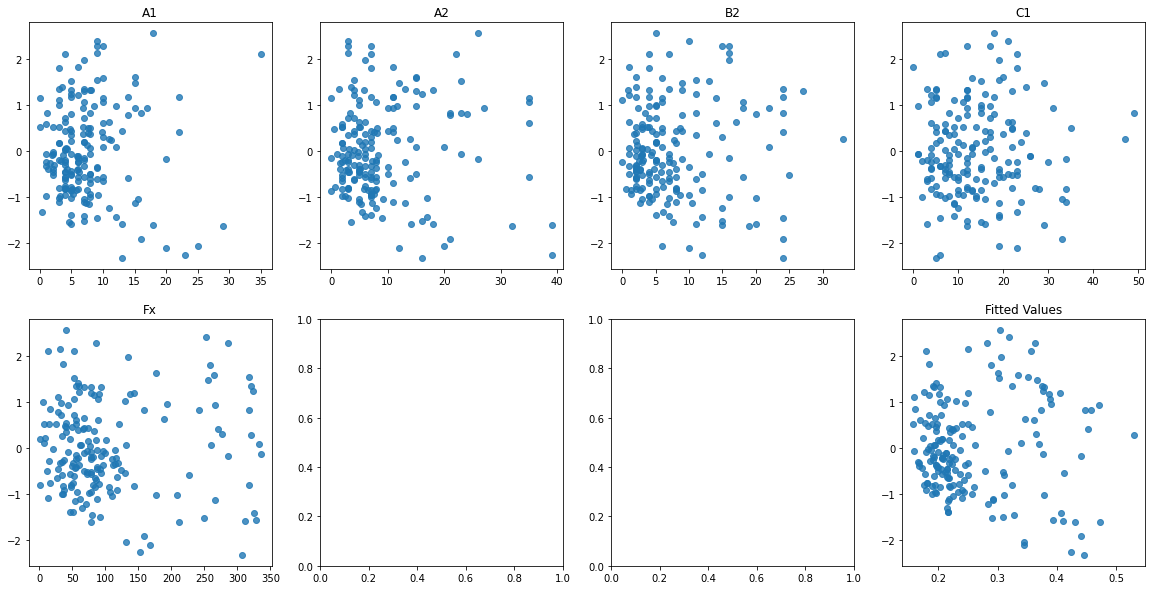

In [25]:
# doing the residuals plots

f, axs = plt.subplots(2,4 , squeeze=False, figsize=(20,10)) 

for i,cc in enumerate(X.columns[1:]):
    plt.subplot(2,4, i+1)
    plt.scatter(X[cc], r_star, alpha=0.8) # r_star is the inf using studentized defined infront
    plt.title(cc)

plt.subplot(2,4,8)
plt.scatter(s_results.fittedvalues, r_star, alpha=0.8)
plt.title('Fitted Values');

In [26]:
s_results_inf.dfbetas.shape # inf object created infront; 414 rows & 6 columns

(180, 6)

In [27]:
s_results_inf.dfbetas[:20, :].round(3) 


array([[-0.061,  0.159,  0.036, -0.236,  0.055,  0.116],
       [ 0.089, -0.211, -0.499,  0.209,  0.275,  0.01 ],
       [ 0.101, -0.006, -0.04 ,  0.063, -0.001, -0.259],
       [-0.01 , -0.02 , -0.131,  0.23 ,  0.059, -0.014],
       [ 0.002,  0.001,  0.012, -0.01 ,  0.009, -0.029],
       [-0.027,  0.013, -0.028, -0.026,  0.026,  0.026],
       [ 0.029,  0.001, -0.022,  0.033, -0.016, -0.02 ],
       [-0.069,  0.064, -0.168, -0.004,  0.005,  0.303],
       [-0.024,  0.009, -0.002,  0.015, -0.012,  0.007],
       [ 0.032, -0.061,  0.001, -0.069,  0.176, -0.039],
       [-0.008,  0.007, -0.006,  0.003,  0.002, -0.001],
       [-0.   ,  0.001,  0.001,  0.006, -0.014,  0.003],
       [-0.1  ,  0.003, -0.027,  0.049,  0.052,  0.024],
       [ 0.03 , -0.014, -0.016,  0.025, -0.023, -0.021],
       [ 0.267, -0.036, -0.024, -0.264, -0.245,  0.112],
       [-0.032,  0.012,  0.017,  0.032,  0.097, -0.185],
       [-0.012,  0.011, -0.028,  0.016, -0.005,  0.04 ],
       [ 0.161, -0.531,  0.059,

### Plot each of the column against each observations up to  to check individually anything standout


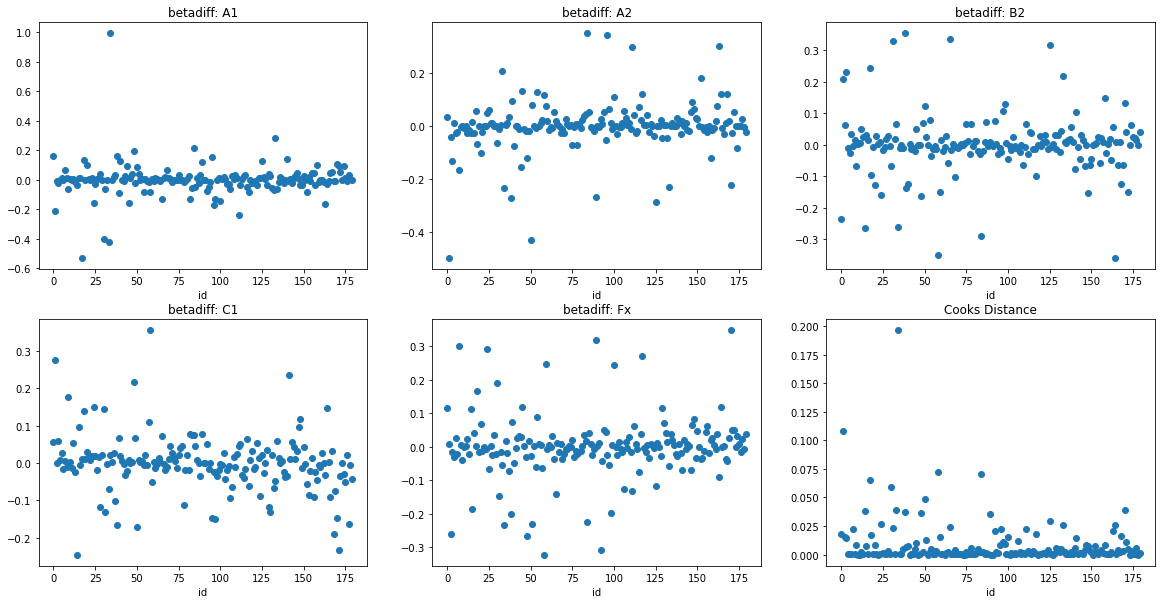

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.scatter(np.arange(180), s_results_inf.dfbetas[:,1]);plt.title('betadiff: A1');plt.xlabel('id'); #col2 (ind 1)
plt.subplot(232)
plt.scatter(np.arange(180), s_results_inf.dfbetas[:,2]);plt.title('betadiff: A2');plt.xlabel('id');
plt.subplot(233)
plt.scatter(np.arange(180), s_results_inf.dfbetas[:,3]);plt.title('betadiff: B2');plt.xlabel('id');
plt.subplot(234)
plt.scatter(np.arange(180), s_results_inf.dfbetas[:,4]);plt.title('betadiff: C1');plt.xlabel('id');
plt.subplot(235)
plt.scatter(np.arange(180), s_results_inf.dfbetas[:,5]);plt.title('betadiff: Fx');plt.xlabel('id');
plt.subplot(236)
plt.scatter(np.arange(180), s_results_inf.cooks_distance[0]);plt.title('Cooks Distance');plt.xlabel('id');

In [33]:
np.where(s_results_inf.cooks_distance[0]>0.1)

(array([ 1, 34], dtype=int64),)

In [35]:
np.where(s_results_inf.dfbetas[:,1]>0.8) #A1

(array([34], dtype=int64),)

In [36]:
X.iloc[34,:]

const     1.0
A1       35.0
A2       22.0
B2        7.0
C1       23.0
Fx       53.0
Name: 34, dtype: float64

In [37]:
y = y.drop(34)
X2 = X.drop(index=34)

X2 = sm.add_constant(X2)
s2_model = sm.OLS(y, X2)
s2_results = s2_model.fit()
s2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Vibration   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     17.02
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           1.13e-13
Time:                        23:20:15   Log-Likelihood:                 131.35
No. Observations:                 179   AIC:                            -250.7
Df Residuals:                     173   BIC:                            -231.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1216      0.020      6.071      0.000       0.082       0.161
A1             0.0004      0.002      0.178      0.859      -0.004       0.005
A2             0.0034      0.002      2.253      0.025       0.000       0.006
B2             0.0056      0.002      3.374      0.001       0.002       0.009
C1             0.0010      0.001      0.935      0.351      -0.001       0.003
Fx             0.0004      0.000      3.588      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.322   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.306
Skew:                           0.343   Prob(JB):                        0.116
Kurtosis:                       2.673   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear regression of the features as expected from the residual plot basically there is no significant direct relationship to the labels.